In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
DF = pd.read_csv("NYC_Citywide_Annualized_Calendar_Sales_Update-3.csv")

In [3]:
DF.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1,FINANCIAL,14 RENTALS - 4-10 UNIT,2A,7,38,NaN,S9,60 PEARL STREET,NaN,...,4027000,01/01/2016,40.703553,-74.011152,101.0,1.0,9.0,1000014.0,1.000070e+09,Battery Park City-Lower Manhattan
1,1,HARLEM-EAST,01 ONE FAMILY DWELLINGS,1,1643,122,NaN,A4,155 EAST 115 STREET,NaN,...,0,01/01/2016,40.797761,-73.941667,111.0,8.0,182.0,1052276.0,1.016430e+09,East Harlem North
2,1,HARLEM-EAST,07 RENTALS - WALKUP APARTMENTS,2,1643,123,NaN,C5,157 EAST 115 STREET,NaN,...,0,01/01/2016,40.797744,-73.941627,111.0,8.0,182.0,1052277.0,1.016430e+09,East Harlem North
3,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1320,4247,NaN,R4,211 EAST 46TH STREET,33J,...,0,01/01/2016,40.753118,-73.972085,106.0,4.0,90.0,1037599.0,1.013208e+09,Turtle Bay-East Midtown
4,1,MIDTOWN EAST,13 CONDOS - ELEVATOR APARTMENTS,2,1365,1526,NaN,R4,400 EAST 54TH STREET,30H,...,0,01/01/2016,40.756237,-73.963995,106.0,4.0,8603.0,1076281.0,1.013658e+09,Turtle Bay-East Midtown


In [4]:
DF.shape

(345059, 29)

In [5]:
#replace the white space in columns by an underscore
DF.columns =DF.columns.str.replace(' ', '_')

In [6]:
# switching the column names to lowercase
DF.columns = map(str.lower, DF.columns)

In [7]:
DF.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_as_of_final_roll', 'block', 'lot', 'ease-ment',
       'building_class_as_of_final_roll', 'address', 'apartment_number',
       'zip_code', 'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'latitude', 'longitude', 'community_board',
       'council_district', 'census_tract', 'bin', 'bbl', 'nta'],
      dtype='object')

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345059 entries, 0 to 345058
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borough                          345059 non-null  int64  
 1   neighborhood                     345059 non-null  object 
 2   building_class_category          345059 non-null  object 
 3   tax_class_as_of_final_roll       341199 non-null  object 
 4   block                            345059 non-null  int64  
 5   lot                              345059 non-null  int64  
 6   ease-ment                        0 non-null       float64
 7   building_class_as_of_final_roll  341199 non-null  object 
 8   address                          345059 non-null  object 
 9   apartment_number                 74790 non-null   object 
 10  zip_code                         345044 non-null  float64
 11  residential_units                329081 non-null  float64
 12  co

In [9]:
# drop the columns that have a lot of missing values
DF = DF.drop(columns = ["ease-ment","apartment_number"])

In [10]:
DF = DF.dropna() #drop the rows that have missing values

In [11]:
DF.info()
DF.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309443 entries, 0 to 345058
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   borough                          309443 non-null  int64  
 1   neighborhood                     309443 non-null  object 
 2   building_class_category          309443 non-null  object 
 3   tax_class_as_of_final_roll       309443 non-null  object 
 4   block                            309443 non-null  int64  
 5   lot                              309443 non-null  int64  
 6   building_class_as_of_final_roll  309443 non-null  object 
 7   address                          309443 non-null  object 
 8   zip_code                         309443 non-null  float64
 9   residential_units                309443 non-null  float64
 10  commercial_units                 309443 non-null  float64
 11  total_units                      309443 non-null  float64
 12  la

(309443, 27)

In [12]:
#Data in certain range.
df = DF[(DF.sale_price >= 500000) & (DF.sale_price < 900000)]

In [13]:
# dropping some text variables that are considered redundant and they seem like have no correlation with the "sale price" 
df = df.drop(columns = ['address', "land_square_feet", "building_class_at_time_of_sale", "sale_date", "nta", "gross_square_feet", "neighborhood", "building_class_as_of_final_roll", "building_class_category" ])
df.shape

(68265, 18)

In [14]:
df.shape

(68265, 18)

In [15]:
df.describe()

,borough,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,sale_price,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,68265.000000,6.826500e+04,6.826500e+04
mean,3.190244,4848.854830,309.586904,10866.520384,1.298982,0.057907,1.403340,1882.092038,1.387431,676264.018370,40.700562,-73.927972,326.836109,28.472321,10288.754325,3.343994e+06,3.228412e+09
std,1.281982,3694.284084,570.900308,641.838910,2.899564,1.455380,3.672728,364.043448,0.588042,112241.168943,0.084357,0.115303,127.575357,15.601989,27539.257963,1.325254e+06,1.308975e+09
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,500000.000000,40.499050,-74.254032,101.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,2.000000,1555.000000,22.000000,10309.000000,1.000000,0.000000,1.000000,1925.000000,1.000000,580000.000000,40.636294,-73.981745,212.000000,18.000000,167.000000,2.101698e+06,2.054290e+09
50%,3.000000,4228.000000,48.000000,11210.000000,1.000000,0.000000,1.000000,1945.000000,1.000000,665000.000000,40.700756,-73.928289,318.000000,29.000000,479.000000,3.421399e+06,3.084130e+09
75%,4.000000,7216.000000,165.000000,11365.000000,2.000000,0.000000,2.000000,1970.000000,2.000000,768000.000000,40.757896,-73.845359,411.000000,43.000000,1201.000000,4.253391e+06,4.097368e+09
max,5.000000,16350.000000,9002.000000,11697.000000,376.000000,259.000000,376.000000,2019.000000,4.000000,899999.000000,40.912572,-73.701405,503.000000,51.000000,157903.000000,5.516445e+06,5.080500e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68265 entries, 76 to 345058
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   borough                     68265 non-null  int64  
 1   tax_class_as_of_final_roll  68265 non-null  object 
 2   block                       68265 non-null  int64  
 3   lot                         68265 non-null  int64  
 4   zip_code                    68265 non-null  float64
 5   residential_units           68265 non-null  float64
 6   commercial_units            68265 non-null  float64
 7   total_units                 68265 non-null  float64
 8   year_built                  68265 non-null  float64
 9   tax_class_at_time_of_sale   68265 non-null  int64  
 10  sale_price                  68265 non-null  int64  
 11  latitude                    68265 non-null  float64
 12  longitude                   68265 non-null  float64
 13  community_board             6

In [17]:
df.columns

Index(['borough', 'tax_class_as_of_final_roll', 'block', 'lot', 'zip_code',
       'residential_units', 'commercial_units', 'total_units', 'year_built',
       'tax_class_at_time_of_sale', 'sale_price', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'bbl'],
      dtype='object')

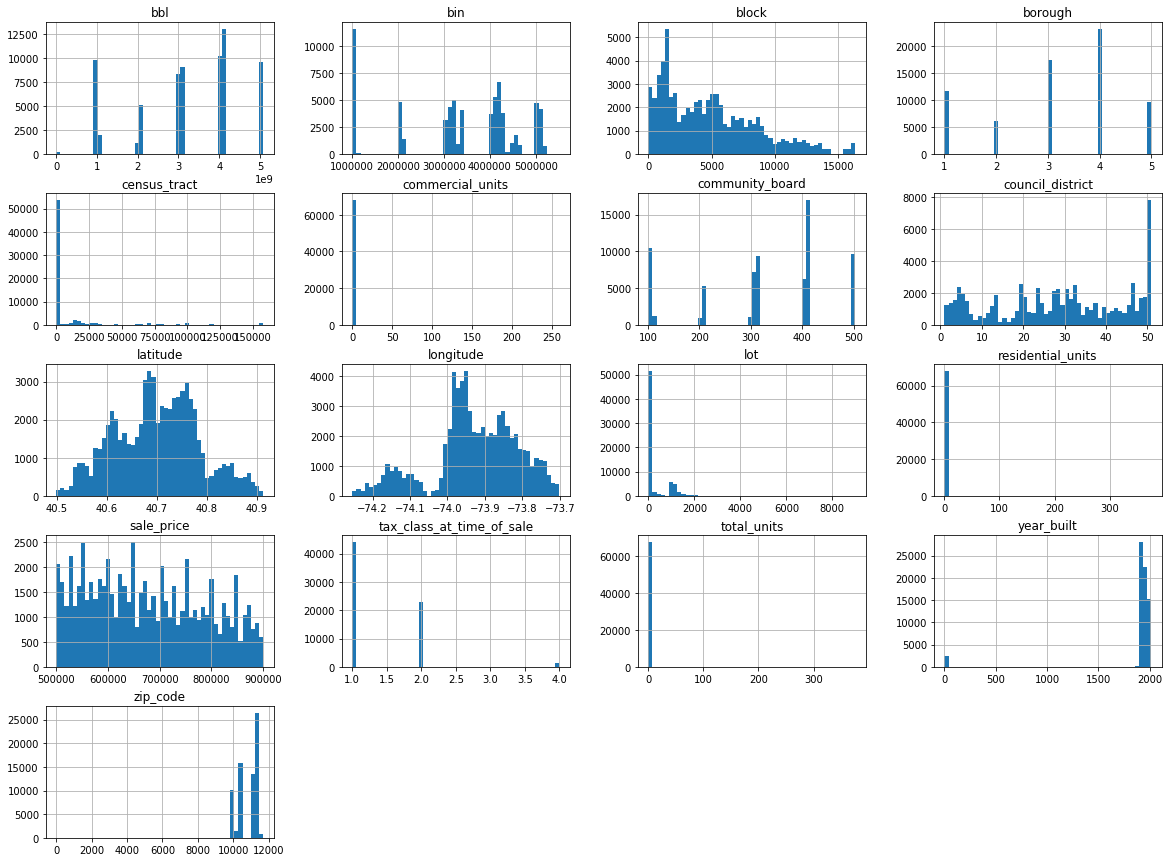

In [18]:
df.hist(bins=50, figsize = (20, 15))
plt.show()

In [19]:
y = df.borough
df = df.drop("borough", axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42, stratify=y) 

In [21]:
X_train.shape


(54612, 17)

In [22]:
X_test.shape

(13653, 17)

In [26]:
y_train.shape

(54612,)

In [23]:
X_train.agg(['count', 'nunique']) # unique values of columns

,tax_class_as_of_final_roll,block,lot,zip_code,residential_units,commercial_units,total_units,year_built,tax_class_at_time_of_sale,sale_price,latitude,longitude,community_board,council_district,census_tract,bin,bbl
count,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612,54612
nunique,10,10718,1990,185,37,15,45,141,3,4439,37458,37982,60,51,1259,39943,39621


#### Transforming the text categorical variable to numeric

In [28]:
text_train = X_train["tax_class_as_of_final_roll"]
text_test = X_test["tax_class_as_of_final_roll"]

In [29]:
from sklearn.preprocessing import OneHotEncoder 

In [38]:
tax_class_train = X_train['tax_class_as_of_final_roll'].values.reshape(-1,1)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tax_class_train_OH_encod = OH_encoder.fit_transform(tax_class_train)
tax_class_train_OH_encod

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
tax_class_train_OH_encod.shape

(54612, 10)

In [39]:
tax_class_test = X_test['tax_class_as_of_final_roll'].values.reshape(-1,1)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tax_class_test_OH_encod = OH_encoder.fit_transform(tax_class_test)
tax_class_test_OH_encod

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
tax_class_test_OH_encod.shape

(13653, 10)

In [46]:
# One-hot encoding removed index; put it back
tax_class_train_OH_encod.index = X_train.index
tax_class_test_OH_encod.index = X_test.index

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [42]:
type(X_train)

pandas.core.frame.DataFrame

In [43]:
type(X_test)

pandas.core.frame.DataFrame

In [44]:
g = X_train.index